<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png"
width="750" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Pablo Ospina.</i>
<br>
<i><b>Asignatura:</b> Vida artificial</i>
<br>
<i><b>Estudiantes:</b> Chiara Valenzuela, Andrea Terraza y Miguel Thomas</i>
<br>
<i><b>Tema:</b> Distribuciones libres de escala</i>
<br>
<i><b>Grupo:</b> Dracarys (A)</i>
<br>
<img src='https://i.pinimg.com/originals/ba/78/85/ba788588817b74ef4713383ceac3e0ef.gif'>
<br>
<i>04/10/24</i>
</FONT>
</p>

# Importaciones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

#1. Un juego simple

• En un casino existe un juego de azar que involucra 2 pasos. Primero, se debe lanzar una moneda.
Segundo, se deben sacar dos bolas de dos urnas diferentes (una bola de cada urna). Las urnas contienen
una distribución de bolas tal como muestra en la siguiente imagen.



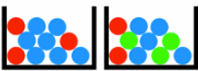


• El jugador ganará un punto si: obtiene sello y al menos una bola de color azul o si obtiene dos bolas del
mismo color. El casino decidió hacer trampa a los jugadores y ha modificado la moneda de tal manera
que la probabilidad de obtener cara es 0.4.
• Encuentre a través de simulación el promedio

* Encuentre a través de simulación el promedio de puntos que el jugador obtendrá, suponiendo que el juego se repite n-veces.

In [ ]:
def simulacionJuego(n):

    points = []

    urn1 = ['rojo', 'rojo', 'rojo', 'azul', 'azul', 'azul', 'azul', 'verde', 'verde']
    urn2 = ['rojo', 'rojo', 'rojo', 'azul', 'azul', 'verde', 'verde']

    for _ in range(n):

        moneda = np.random.choice(['cara', 'sello'], p=[0.4, 0.6])

        bola_urna1 = np.random.choice(urn1)
        bola_urna2 = np.random.choice(urn2)

        if moneda == 'sello' and ('azul' in [bola_urna1, bola_urna2]):
            points.append(1)
        elif bola_urna1 == bola_urna2:
            points.append(1)
        else:
            points.append(0)

    points = np.array(points)
    promedio_puntos = np.mean(points)
    return points, promedio_puntos

In [ ]:
avg = []
n_values = [10, 100, 1000]
p_repeticiones = []
for n in n_values:
    points, promedio_puntos = simulacionJuego(n)
    p_repeticiones.append(points)
    avg.append(promedio_puntos)
    print(f"Para n = {n}, el promedio de puntos es: {promedio_puntos}")


_, promedio_puntos = simulacionJuego(10000)
print(f"Para n = {10000}, el promedio de puntos es: {promedio_puntos}")

Para n = 10, el promedio de puntos es: 0.5
Para n = 100, el promedio de puntos es: 0.64
Para n = 1000, el promedio de puntos es: 0.622
Para n = 10000, el promedio de puntos es: 0.6168


El comportamiento de las simulaciones refleja que con pocas repeticiones, la variación en el resultado del promedio de puntos es grande, esto es debido a la naturaleza aleatoria del juego. A medida que aumentan las repeticiones, las variaciones disminuyen y el promedio se estabiliza, acercándose al verdadero valor esperado.

En este caso, el valor esperado en las simulaciones tiende a estar alrededor de 0.61.

* Visualice una serie de tiempo donde se vea el cambio de los puntos promedio obtenidos por el jugador
para valores de 𝑛 de 10, 100 y 1000

In [ ]:
promedios = []
# serie de tiempo del promedio acumulado
for i in range(len(n_values)):
    n = n_values[i]
    promedios.append(np.cumsum(p_repeticiones[i]) / np.arange(1, n + 1))

In [ ]:
def graficar_serie_tiempo(n_values,promedios):
  fig, axes = plt.subplots(len(n_values), 1, figsize=(12, 8))
  for i in range(len(n_values)):
      n = n_values[i]
      axes[i].plot(np.arange(1, n + 1), promedios[i], label=f'n = {n}', linewidth=2,color="blue")
      axes[i].set_title(f'Serie de tiempo de puntos promedio (n = {n})')
      axes[i].set_xlabel('Número de repeticiones')
      axes[i].set_ylabel('Promedio puntos')
      axes[i].legend()
  plt.tight_layout()
  plt.show()

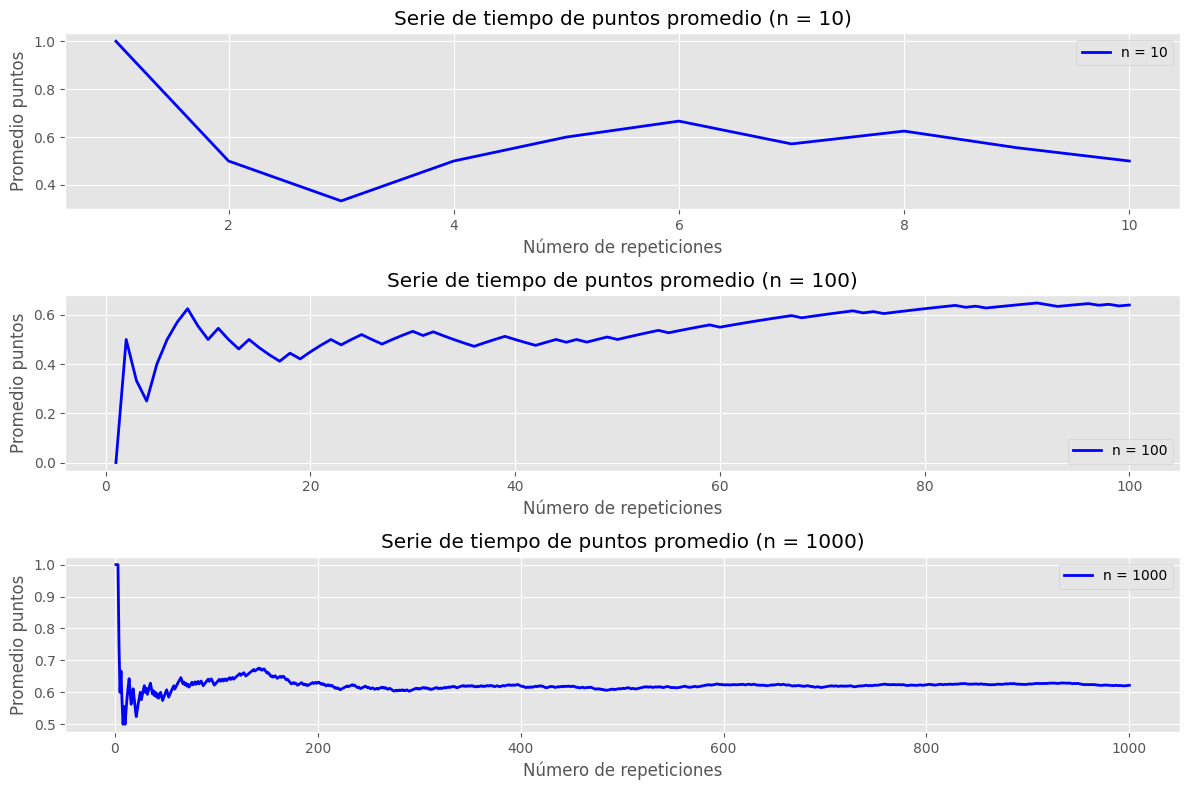

In [ ]:
graficar_serie_tiempo(n_values,promedios)

**Línea (n = 10):** Las fluctuaciones son grandes debido a la pequeña cantidad de repeticiones. El promedio de puntos varía abruptamente en las primeras repeticiones.

**Línea (n = 100):** A medida que el número de repeticiones aumenta, las fluctuaciones comienzan a reducirse y el promedio se estabiliza progresivamente. Sin embargo, todavía hay cierta inestabilidad.

**Línea(n = 1000):** Con un número mayor de repeticiones, el promedio de puntos se estabiliza mucho más, oscilando alrededor del valor esperado (cerca de 0.61), con fluctuaciones mucho más pequeñas.

* Calcule los puntos promedio obtenidos por el jugador en 1000 partidas diferentes (cada partida con 1000
repeticiones) y genere un histograma con el número de puntos obtenidos por el jugador


In [ ]:
n_partidas = 1000
n_repeticiones_por_partida = 1000
puntos_promedio = []

for _ in range(n_partidas):
    _,promedio_puntos = simulacionJuego(n_repeticiones_por_partida)
    puntos_promedio.append(promedio_puntos)

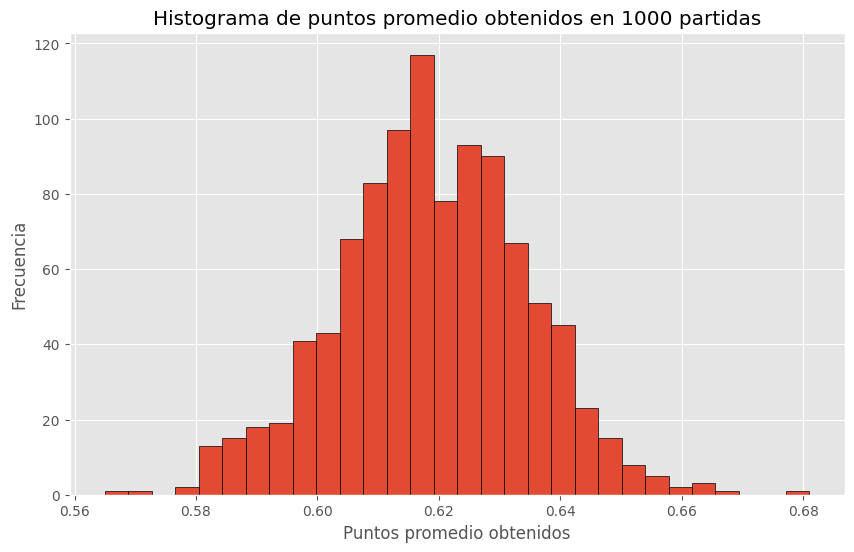

media:  0.618903


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(puntos_promedio, bins=30, edgecolor='black')
plt.xlabel('Puntos promedio obtenidos')
plt.ylabel('Frecuencia')
plt.title('Histograma de puntos promedio obtenidos en 1000 partidas')
plt.grid(True)
plt.show()
print("media: ", np.mean(puntos_promedio))

* Interprete los resultados del histograma.

El histograma tiene una distribución parecida a la normal , en la que la mayoria de los datos estan concentrados cerca a la media. Esto sucede porque al realizarse tantas simulaciones de las partidas (1000 partidas por cada juego, y se hacen 1000 juegos), El valor del promedio de puntos obtenidos intenta parecerce al valor esperado que esta cercano a 0.62. Los valores extremos que se pueden observar son ocacionados en las primeras simulaciones cuando han habido pocas repeticiones, debido a la naturaleza aleatoria de los datos.


1. **Promedio de puntos obtenidos**: El histograma muestra que los jugadores obtienen un puntaje promedio alrededor de **0.62** en las simulaciones. Esto refleja que, a pesar de la trampa del casino, los jugadores ganan puntos en un 62% de las ocasiones.

2. **Relación con la trampa del casino**: El casino ha modificado la probabilidad de la moneda a **0.4**, pero el juego sigue favoreciendo al jugador debido a las reglas adicionales, como sacar bolas del mismo color o al menos una bola azul, lo que compensa la trampa y mantiene el puntaje promedio alto.

4. **Sobre la trampa y el juego**: La trampa del casino no afecta drásticamente las probabilidades de ganar puntos porque las reglas de las urnas permiten al jugador obtener un puntaje promedio cercano a **0.62**, lo que sugiere que el diseño del juego equilibra el efecto de la trampa.

5. **Interpretación del histograma**: El histograma refleja que el juego tiene un comportamiento estable, con la mayoría de las simulaciones agrupadas alrededor del promedio de **0.62**, indicando que el jugador tiene una probabilidad significativa de éxito a pesar de la trampa del casino.

#2.  El juego de San Petersburgo. Parte 1

###Reglas

**Primer lanzamiento:**

  Si el jugador obtiene cara, gana 2 puntos y el juego termina.
  
  Si obtiene sello, debe lanzar de nuevo.

**Siguientes lanzamientos:**

  Si en cualquier lanzamiento después del primero obtiene cara, gana el doble de los puntos obtenidos en el lanzamiento anterior. Por ejemplo, si obtiene cara en el segundo lanzamiento, gana 4 puntos, si es en el tercer lanzamiento gana 8 puntos, y así sucesivamente.

  Si sigue obteniendo sello, el jugador continúa lanzando hasta obtener cara.

* Simule el juego descrito anteriormente y encuentre el promedio de puntos obtenidos por él jugador,
suponiendo que el juego se repite n-veces.

In [ ]:
def lanzar_moneda(p_cara=0.5):
    puntos = 0
    n = 0
    lanzamiento = np.random.choice(['cara', 'sello'], p=[p_cara, 1-p_cara])

    while lanzamiento == 'sello':
        n += 1
        lanzamiento = np.random.choice(['cara', 'sello'], p=[p_cara, 1-p_cara])

    if(lanzamiento == 'cara'):
          puntos = 2**(n+1)

    return puntos

In [ ]:
def simular_juego(n,p_cara=0.5):
    resultados = []
    for _ in range(n):
        puntos = lanzar_moneda(p_cara)
        resultados.append(puntos)
    return resultados

In [ ]:
n_values = [10, 100, 1000, 10000]
promedios = []
p_repeticiones=[]

for n in n_values:
    resultados = simular_juego(n)
    p_repeticiones.append(resultados)
    promedio = np.mean(resultados)
    promedios.append(promedio)
    print(f"Para n = {n}, el promedio de puntos es: {promedio}")

Para n = 10, el promedio de puntos es: 6.8
Para n = 100, el promedio de puntos es: 5.0
Para n = 1000, el promedio de puntos es: 7.11
Para n = 10000, el promedio de puntos es: 15.3216


* Visualice una serie de tiempo donde se vea el cambio de los puntos promedio obtenidos por el jugadorpara valores de 𝑛 de 10, 100, 1000 y 10.000

In [ ]:
promedios = []

# serie de tiempo del promedio acumulado
for i in range(len(n_values)):
    n = n_values[i]
    promedios.append(np.cumsum(p_repeticiones[i]) / np.arange(1, n + 1))

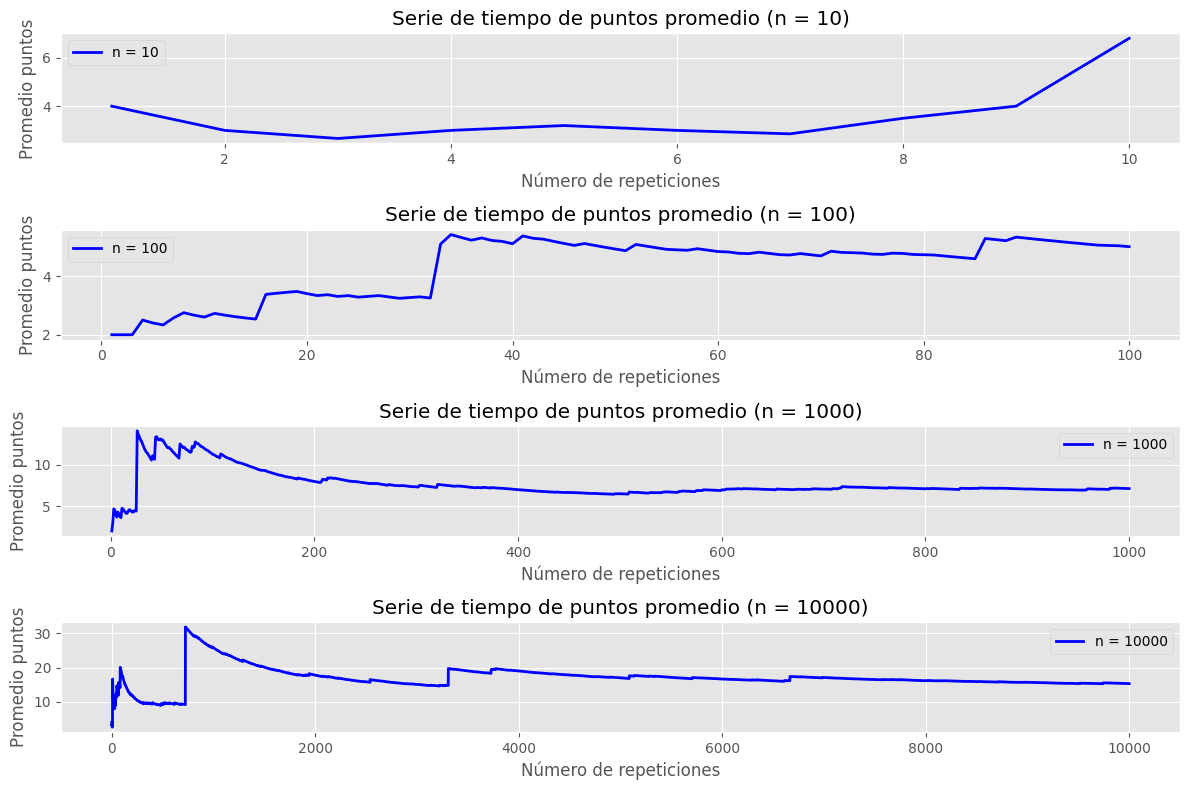

In [ ]:
graficar_serie_tiempo(n_values,promedios)

El comportamiento de la serie de tiempo refleja el proceso aleatorio del juego. Al principio, con pocas repeticiones, el promedio puede variar mucho debido a la alta volatilidad de obtener lanzamientos largos y, por lo tanto, puntajes altos. Sin embargo, conforme se acumulan más partidas, el promedio comienza a estabilizarse. Las reglas del juego, donde el puntaje aumenta exponencialmente con el número de lanzamientos, generan una alta variabilidad inicial, pero esta se va reduciendo con más repeticiones debido al efecto suavizante de los promedios acumulados.

* Calcule los puntos promedio obtenidos por el jugador en 1000 juegos diferentes (cada juego con 1000 repeticiones) y genere un histograma con el número de puntos obtenidos por el jugador.

In [ ]:
def graficar_histograma(resultados_1000_juegos):
  plt.figure(figsize=(10, 6))
  plt.hist(resultados_1000_juegos, bins=30, color='green', edgecolor='black')
  plt.xlabel('Promedio de puntos obtenidos')
  plt.ylabel('Frecuencia')
  plt.title('Distribución de puntos  en 1000 juegos')
  plt.grid(True)
  plt.show()
  print("media: ", np.mean(resultados_1000_juegos))

In [ ]:
resultados_1000_juegos = [np.mean(simular_juego(1000)) for _ in range(1000)]

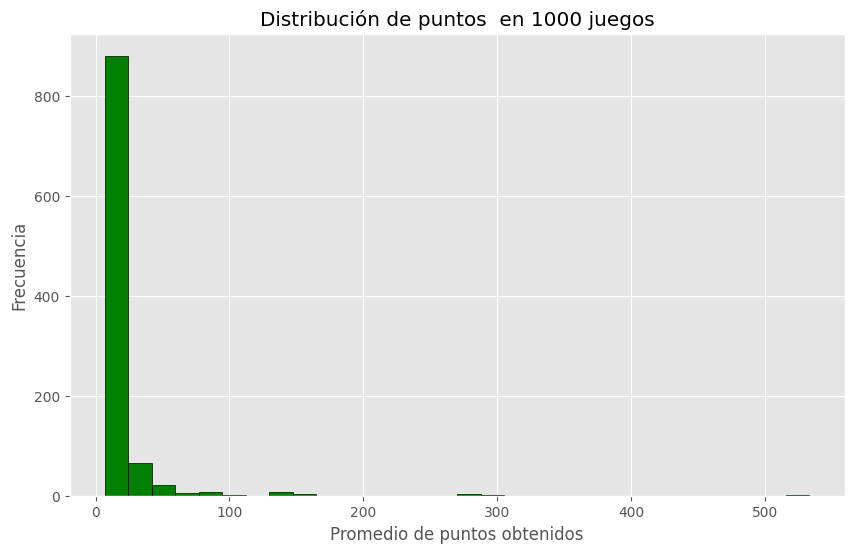

media:  19.109741999999997


In [ ]:
graficar_histograma(resultados_1000_juegos)

* **Frecuencia Alta de Puntos Bajos:** En la mayoría de los casos, los jugadores obtendrán la cara relativamente temprano en el juego, lo que lleva a la obtención de puntajes más bajos (2, 4, 8 puntos, etc.). Por eso, la distribución está fuertemente sesgada hacia la izquierda.


* **Eventos Raros pero Excepcionales:** En algunos juegos, el jugador puede obtener muchos sellos antes de obtener cara, lo que produce puntajes exponencialmente más altos (64, 128, 256 puntos o más). Estos valores son raros, pero cuando ocurren, causan la presencia de valores alejados de la media, como se observa en la cola de la derecha del gráfico.

El comportamiento de esta distribución refleja las reglas del juego. La gran mayoría de los puntajes son bajos debido a que los jugadores suelen obtener cara después de unos pocos lanzamientos. Sin embargo, la naturaleza exponencial del puntaje y la posibilidad de obtener muchos sellos antes de una cara crea una distribución con una cola larga hacia la derecha, lo que indica la posibilidad de obtener puntajes excepcionalmente altos, aunque esto sea raro.

# El juego de San Petersburgo. Parte 2

* Repita el procedimiento anterior, pero ahora considere la probabilidad de obtener una cara igual al 25%.

* Interprete los resultados.

In [ ]:
n_values = [10, 100, 1000, 10000]
promedios = []
p_repeticiones=[]

for n in n_values:
    resultados = simular_juego(n,p_cara=0.25)
    p_repeticiones.append(resultados)
    promedio = np.mean(resultados)
    promedios.append(promedio)
    print(f"Para n = {n}, el promedio de puntos es: {promedio}")

Para n = 10, el promedio de puntos es: 7.8
Para n = 100, el promedio de puntos es: 3487.68
Para n = 1000, el promedio de puntos es: 5536.356
Para n = 10000, el promedio de puntos es: 165077.6576


In [ ]:
promedios = []

# serie de tiempo del promedio acumulado
for i in range(len(n_values)):
    n = n_values[i]
    promedios.append(np.cumsum(p_repeticiones[i]) / np.arange(1, n + 1))

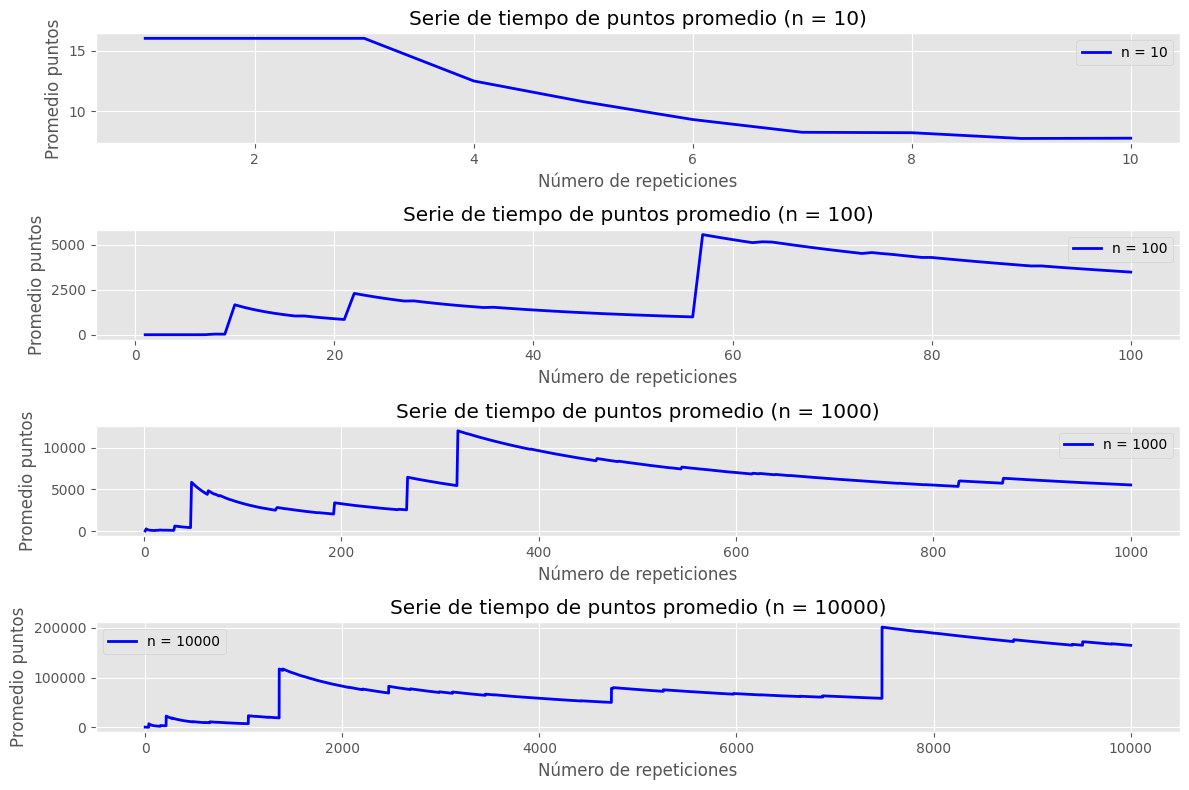

In [ ]:
graficar_serie_tiempo(n_values,promedios)

* **Alto Puntaje Inicial:** La baja probabilidad de obtener cara (25%) significa que el jugador tendrá que realizar más lanzamientos antes de conseguir su primera cara en cada juego. Dado que los puntos se incrementan exponencialmente con el número de lanzamientos, los puntajes al principio tienden a ser mucho más altos que con una probabilidad del 50%.

* **Caída del Promedio:** Conforme se juegan más juegos, los valores extremos (partidas con muchos lanzamientos antes de obtener cara) se vuelven menos frecuentes en comparación con juegos que tienen un número más "normal" de lanzamientos. Esto hace que el promedio acumulado disminuya rápidamente y se acerque a un valor más estable.

* **estabilización:** a medida que hacemos más repeticiones (como en las series con n = 1000 y n = 10000), el promedio de puntos se estabiliza. Esto significa que los eventos raros tienen menos influencia en el promedio porque estamos viendo muchos más resultados. Sin embargo, esos eventos raros, donde el jugador gana muchos puntos, siguen apareciendo de vez en cuando y todavía causan algunos picos en la gráfica.


El cambio en la probabilidad de obtener cara de 50% a 25% genera una mayor variabilidad en los primeros juegos, lo que resulta en puntajes más altos debido a la naturaleza exponencial del juego. Sin embargo, con suficientes repeticiones, el promedio acumulado tiende a estabilizarse, aunque a un ritmo más lento debido a la posibilidad de obtener más juegos con puntajes extremadamente altos al principio del proceso.

In [ ]:
resultados_1000_juegos = []
resultados_1000_juegos = [np.mean(simular_juego(1000,p_cara=0.25)) for _ in range(1000)]

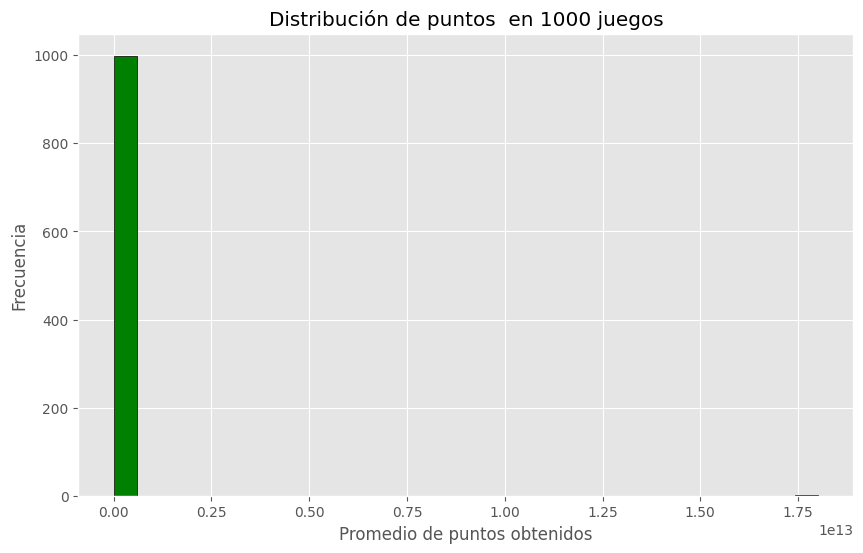

media:  18087092894.501625


In [ ]:
graficar_histograma(resultados_1000_juegos)

* **Concentración en Puntajes Bajos:** Al observar el histograma, la mayoría de los juegos tienen un promedio de puntos extremadamente bajo, acumulándose principalmente cerca de cero en el eje de los puntos.
* **Cola Muy Larga a la Derecha:** Existe una cola extremadamente larga que se extiende hasta valores muy altos (del orden de 1×10^13), lo que representa juegos donde los puntajes son extremadamente altos debido a la cantidad de lanzamientos requeridos antes de obtener cara.

Hay juegos con puntajes extremadamente altos debido a largos períodos de lanzamientos sin obtener cara. Esto genera una distribución altamente sesgada con una cola larga. Este comportamiento es característico de fenómenos que siguen una distribución con colas pesadas, como la distribución exponencial observada aquí.


* Repita el procedimiento anterior, pero ahora considere la probabilidad de obtener una cara igual al 75%.

* Interprete los resultados.

In [ ]:
n_values = [10, 100, 1000, 10000]
promedios = []
p_repeticiones=[]

for n in n_values:
    resultados = simular_juego(n,p_cara=0.75)
    p_repeticiones.append(resultados)
    promedio = np.mean(resultados)
    promedios.append(promedio)
    print(f"Para n = {n}, el promedio de puntos es: {promedio}")

Para n = 10, el promedio de puntos es: 2.6
Para n = 100, el promedio de puntos es: 2.78
Para n = 1000, el promedio de puntos es: 3.006
Para n = 10000, el promedio de puntos es: 3.027


In [ ]:
promedios = []

# serie de tiempo del promedio acumulado
for i in range(len(n_values)):
    n = n_values[i]
    promedios.append(np.cumsum(p_repeticiones[i]) / np.arange(1, n + 1))

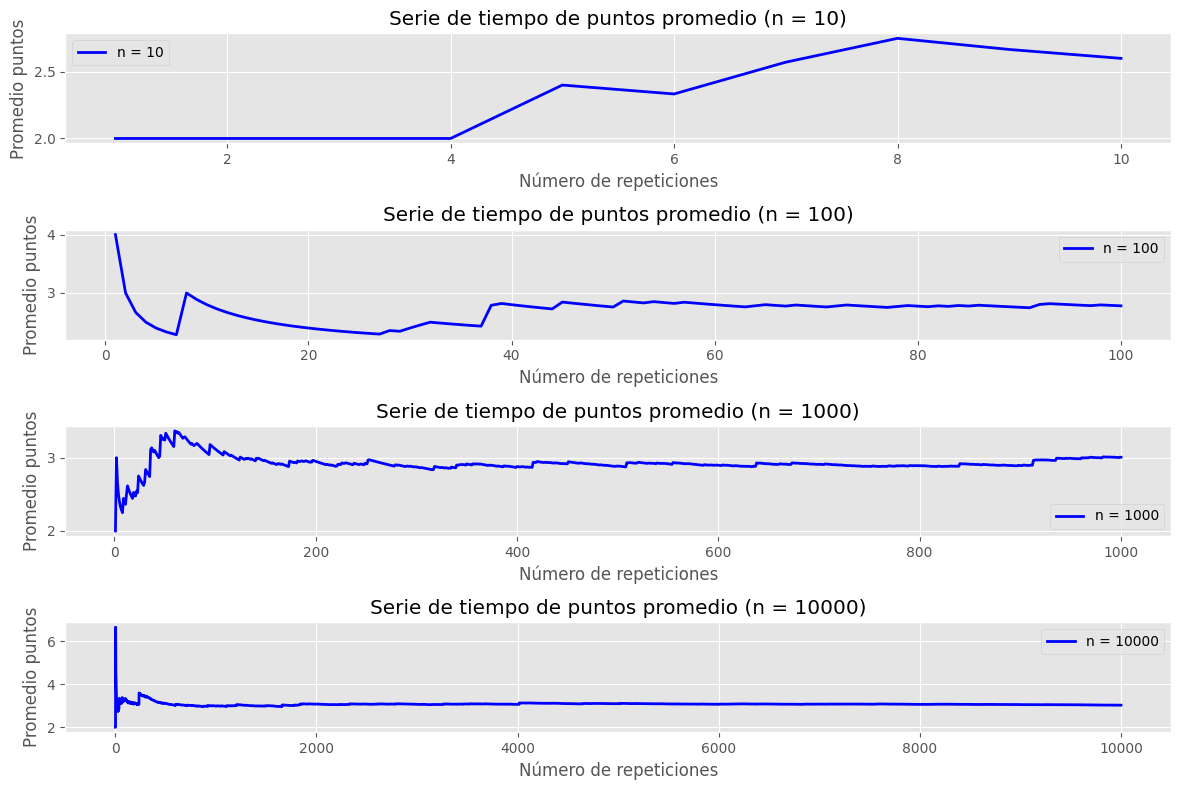

In [ ]:
graficar_serie_tiempo(n_values,promedios)

* **Comportamiento Inicial:** El promedio acumulado comienza en valores altos y bajos y fluctúa bastante en las primeras repeticiones. Esto es común en los procesos aleatorios al principio, ya que las pocas muestras generan una mayor variabilidad en el promedio.
* **Disminución y Estabilización:** Después de un número mayor de repeticiones, el promedio acumulado de puntos empieza a estabilizarse alrededor de un valor más constante para las repeticiones de n=100,1000,10000, entre 2.9 y 3.0, y presenta cambios menores alrededor de ese rango.
* **Estabilidad General:** A medida que se alcanzan las 10000 repeticiones, el promedio acumulado muestra una tendencia a estabilizarse, reflejando un comportamiento más consistente conforme se promedian más juegos.

Con una probabilidad de obtener cara del 75%, el comportamiento de la serie de tiempo muestra una rápida estabilización en comparación con juegos donde la probabilidad de cara es menor. La alta probabilidad reduce la cantidad de lanzamientos antes de obtener cara en la mayoría de los juegos, lo que genera puntajes más bajos y una menor varianza en los resultados. El promedio acumulado se estabiliza alrededor de 3.0 después de suficientes repeticiones, reflejando que, aunque existen fluctuaciones al inicio, estas se disipan rápidamente debido a la alta probabilidad de obtener cara.

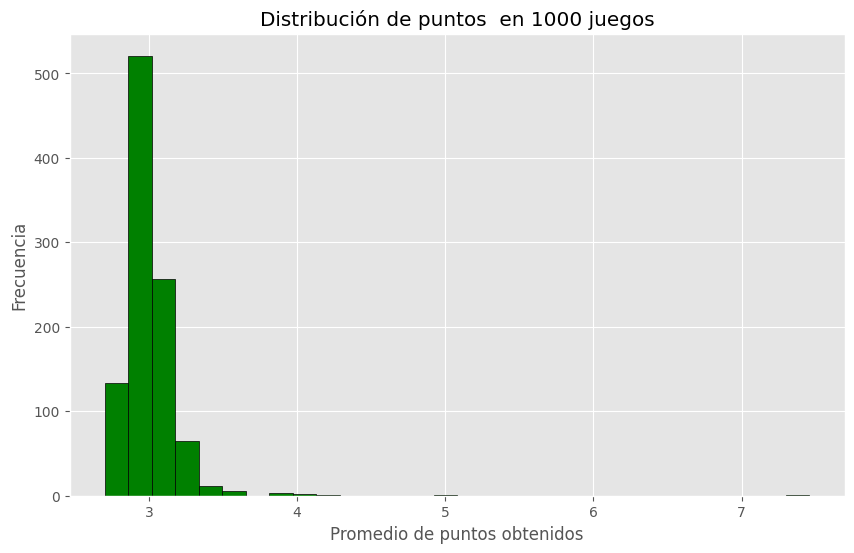

media:  3.00483


In [ ]:
resultados_1000_juegos = []
resultados_1000_juegos = [np.mean(simular_juego(1000,p_cara=0.75)) for _ in range(1000)]

graficar_histograma(resultados_1000_juegos)

* **Concentración en Valores Bajos:** La mayoría de los juegos tienen un promedio de puntos entre 3 y 4. Esto es consistente con la probabilidad alta de obtener cara (75%), ya que los jugadores tienden a obtener cara rápidamente y, por lo tanto, sus puntajes son bajos en la mayoría de los juegos.
* **Distribución Sesgada a la Derecha:** Aunque la mayoría de los puntajes están concentrados en el rango bajo (cerca de 3), existe una pequeña cola hacia la derecha, que llega hasta puntajes más altos (alrededor de 7)

El histograma refleja el efecto de la alta probabilidad de obtener cara (75%) en el comportamiento del juego. La mayoría de los juegos resultan en puntajes bajos, y la distribución está fuertemente concentrada en torno a un valor promedio cercano a 3. Aunque existen algunos juegos con más lanzamientos que generan puntajes más altos, estos son menos frecuentes, lo que reduce la cola derecha de la distribución. En general, la alta probabilidad de cara contribuye a una distribución más concentrada y con menos variabilidad.

# 5. Frecuencia de las palabras

* Cada miembro del grupo debe seleccionar un texto para analizar (una canción, un poema, el capítulo de
un libro, etc.)
* Encuentre la frecuencia de aparición de cada palabra (omita signos de puntuación).

In [ ]:

cancion1 = """There ain't no gold in this river
That I've been washing my hands in forever
I know there is hope in these waters
But I can't bring myself to swim
When I am drowning in this silence, baby, let me in
Go easy on me, baby
I was still a child
Didn't get the chance to
Feel the world around me
I had no time to choose what I chose to do
So go easy on me
There ain't no room for our things to change
When we are both so deeply stuck in our ways
You can't deny how hard I've tried
I changed who I was to put you both first
But now I give up
Go easy on me, baby
I was still a child
Didn't get the chance to
Feel the world around me
Had no time to choose what I chose to do
So go easy on me
I had good intentions
And the highest hopes
But I know right now
It probably doesn't even show
Go easy on me, baby
I was still a child
I didn't get the chance to
Feel the world around me
I had no time to choose what I chose to do
So go easy on me"""


In [ ]:
cancion2 = """You've been on my mind
I grow fonder every day, lose myself in time
Just thinking of your face
God only knows
Why it's taken me so long to let my doubts go
You're the only one that I want
I don't know why I'm scared
I've been here before
Every feeling, every word
I've imagined it all
You'll never know if you never try to forget your past and simply be mine
I dare you to let me be your, your one and only
Promise I'm worth it
To hold in your arms
So come on and give me the chance
To prove I am the one who can
Walk that mile
Until the end starts
If I've been on your mind
You hang on every word I say, lose yourself in time
At the mention of my name
Will I ever know
How it feels to hold you close
And have you tell me
Which ever road I choose, you'll go?
I don't know why I'm scared
'Cause I've been here before
Every feeling, every word
I've imagined it all
You'll never know if you never try to forget your past and simply be mine
I dare you to let me be your, your one and only
I promise I'm worth it
To hold in your arms
So come on and give me the chance
To prove I am the one who can
Walk that mile
Until the end starts
I know it ain't easy, giving up your heart
I know it ain't easy, giving up your heart
(Nobody's perfect) I know it ain't easy, (trust me, I've learned it) giving up your heart
(Nobody's perfect) I know it ain't easy, (trust me, I've learned it) giving up your heart
(Nobody's perfect) I know it ain't easy, (trust me, I've learned it) giving up your heart
(Nobody's perfect) I know it ain't easy, (trust me, I've learned it) giving up your heart
So I dare you to let me be your, your one and only
I promise I'm worth it
To hold in your arms
So come on and give me the chance
To prove I am the one who can
Walk that mile
Until the end starts
Come on and give me the chance
To prove I am the one who can
Walk that mile
Until the end starts
"""

In [ ]:
cancion3 = """How can one become so bounded by choices that somebody else makes?
How come we've both become a version of a person we don't even like?
We're in love with the world, but the world just wants to bring us down
By puttin' ideas in our heads that corrupt our hearts somehow
When I was a child, every single thing could blow my mind
Soakin' it all up for fun, but now I only soak up wine
They say to play hard, you work hard, find balance in the sacrifice
And yet I don't know anybody who's truly satisfied
You better believe I'm tryin' (tryin', tryin')
To keep climbin' (climbin', climbin')
But the higher we climb, feels like we're both none the wiser
So I hope I learn to get over myself
Stop trying to be somebody else
So we can love each other for free
Everybody wants something, you just want me
Why am I obsessin' about the things I can't control?
Why am I seekin' approval from people I don't even know?
In these crazy times, I hope to find somethin' I can cling on to
'Cause I need some substance in my life, somethin' real, somethin' that feels true
You better believe, for you, I've cried (I've cried, I've cried)
High tides (high tides, high tides)
'Cause I want you so bad, but you can't fight fire with fire, oh
Oh (so), I hope I learn to get over myself
Stop trying to be somebody else
Oh, I just want to love you, love you for free
Everybody wants something from me, you just want me
Listen, I know how low I can go, I give as good as I get
You get the brunt of it all 'cause you're all I've got left
Oh, I hope in time (hope in time)
We both will find (we'll both find) peace of mind
Sometimes the road less travelled is a road best left behind
Well (so), I hope I learn to get over myself
Stop trying to be somebody else
Oh, I just want to love you, love you for free, yeah
'Cause everybody wants something from me, you just want me
You better believe I'm tryin' (tryin', tryin')
To keep climbin' (climbin', climbin')
But the higher we climb, feels like we're both none the wiser
The only regret I have
I wish that it was just at a different time
A most turbulent period of my life
Why would I put that on you?
That's just like a very heavy thing to have to talk about
But because of that period of time
Even though it was so much fun
I didn't get to go on and make new memories with him
There was just memories in a big storm

"""

In [ ]:
import string
def limpiar_texto(texto):

    caracteres_a_eliminar = string.punctuation + "()" + "'\""

    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', caracteres_a_eliminar))
    return texto

In [ ]:
from collections import Counter

def contar_palabras(texto):

    texto_limpio = limpiar_texto(texto)
    palabras = texto_limpio.split()
    frecuencia_palabras = Counter(palabras)

    return frecuencia_palabras

In [ ]:
def graficar_frecuencia(frecuencia_palabras, titulo):

    # Ordenar las palabras por frecuencia
    palabras, frecuencias = zip(*frecuencia_palabras.most_common())

    plt.figure(figsize=(10, 6))
    plt.bar(palabras[:10], frecuencias[:10])
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de palabras en "{titulo}"')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [ ]:
def estadisticos (frecuencias,title):
  media = np.mean(frecuencias)
  mediana = np.median(frecuencias)
  moda = Counter(frecuencias).most_common(1)[0][0]
  varianza = np.var(frecuencias)
  desviacion_estandar= np.std(frecuencias)

  print(f"{title} - Estadísticas")
  print(f"Total de palabras: ",np.sum(frecuencias))
  print(f"Media: {media}")
  print(f"Mediana: {mediana}")
  print(f"Moda: {moda}")
  print(f"Varianza: {varianza}")
  print(f"Desviación Estándar: {desviacion_estandar}")

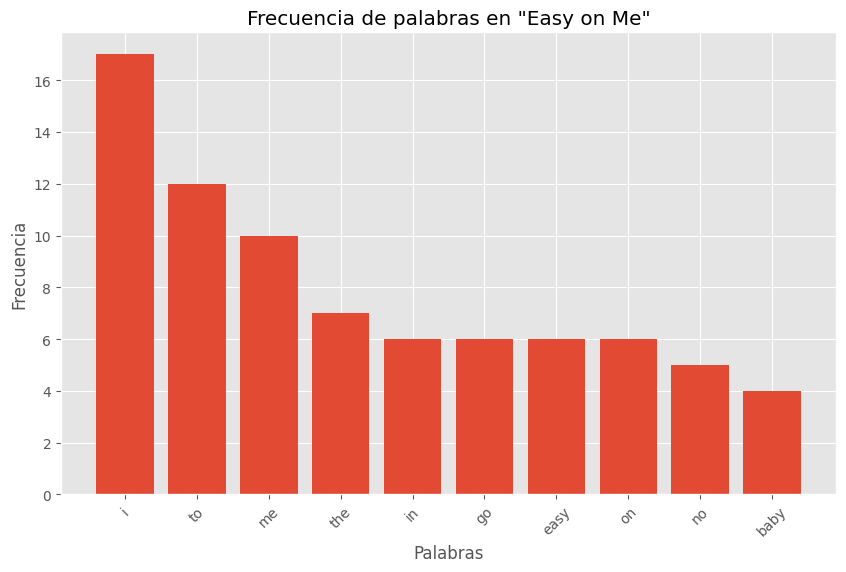

In [ ]:
frecuencia_cancion1 = contar_palabras(cancion1)
graficar_frecuencia(frecuencia_cancion1, "Easy on Me")


In [ ]:
_, frecuencias = zip(*frecuencia_cancion1.most_common())
estadisticos(frecuencias,"Easy on Me")

Easy on Me - Estadísticas
Total de palabras:  208
Media: 2.3636363636363638
Mediana: 1.0
Moda: 1
Varianza: 6.322314049586776
Desviación Estándar: 2.5144212156253327


La media de la frecuencia de palabras es baja (2.36), lo que significa que la mayoría de las palabras se repiten solo una o dos veces. La mediana de 1.0 y la moda de 1 indican que la mayor parte de las palabras aparecen solo una vez, lo que se evidencia en la distribución sesgada a la derecha. La varianza moderada (6.32) y la desviación estándar (2.51) indican que hay cierta dispersión, pero en general, la mayoría de las palabras tienen frecuencias bajas.

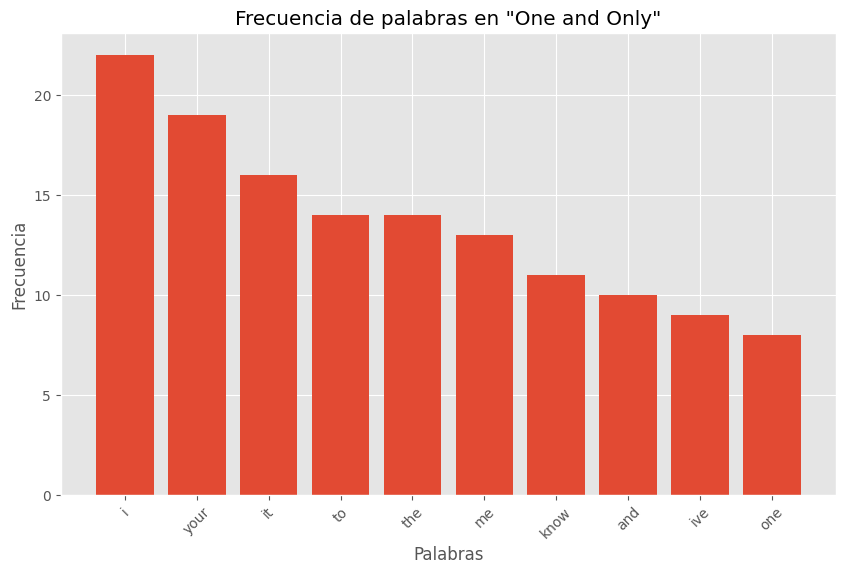

In [ ]:
frecuencia_cancion3 = contar_palabras(cancion2)
graficar_frecuencia(frecuencia_cancion3, "One and Only")

In [ ]:
_, frecuencias = zip(*frecuencia_cancion3.most_common())
estadisticos(frecuencias,"One and Only")

One and Only - Estadísticas
Total de palabras:  392
Media: 3.8058252427184467
Mediana: 3.0
Moda: 1
Varianza: 14.758412668489015
Desviación Estándar: 3.841667953960755


La media es más alta (3.81), lo que significa que las palabras se repiten más frecuentemente en comparación con "Easy on Me". Sin embargo, la mediana de 3 y la moda de 1 muestran que todavía muchas palabras aparecen solo una vez. La varianza (14.76) y la desviación estándar (3.84) son significativamente mayores, lo que indica una mayor dispersión en las frecuencias. Esto sugiere que algunas palabras aparecen con mucha mayor frecuencia, mientras que otras siguen apareciendo solo una vez.

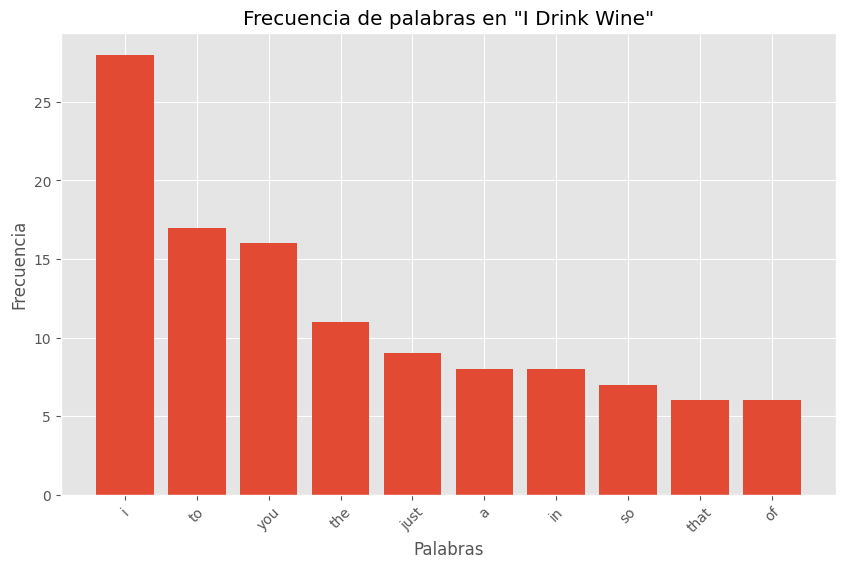

In [ ]:
frecuencia_cancion2 = contar_palabras(cancion3)
graficar_frecuencia(frecuencia_cancion2, "I Drink Wine")

In [ ]:
_, frecuencias = zip(*frecuencia_cancion2.most_common())
estadisticos(frecuencias,"I Drink Wine")

I Drink Wine - Estadísticas
Total de palabras:  463
Media: 2.502702702702703
Mediana: 1.0
Moda: 1
Varianza: 8.822965668371074
Desviación Estándar: 2.9703477352611554


La media es similar a la de "Easy on Me" (2.50), lo que indica que la mayoría de las palabras no se repiten muchas veces. La mediana de 1.0 y la moda de 1 confirman que muchas palabras solo aparecen una vez. Sin embargo, la varianza y la desviación estándar son ligeramente más altas que en "Easy on Me", lo que sugiere una mayor dispersión en las frecuencias. Esto significa que, aunque muchas palabras aparecen solo una vez, hay otras que se repiten con más frecuencia.



* Interprete los resultados



###Comparación General

**"Easy on Me"** tiene una distribución concentrada: La mayoría de las palabras aparecen solo una o dos veces. Hay poca dispersión en las frecuencias, lo que sugiere que la canción tiene una estructura más repetitiva en cuanto a sus palabras menos frecuentes.

**"One and Only"** muestra una mayor dispersión en la distribución de palabras: Aunque muchas palabras aparecen una sola vez, hay un conjunto más grande de palabras que se repiten varias veces, lo que eleva la media y aumenta la dispersión. Esto sugiere una mayor variedad en las palabras repetidas, con un pequeño número de palabras clave que dominan la letra.

**"I Drink Wine"** tiene una distribución intermedia: Aunque la mayoría de las palabras aparecen solo una vez, hay una mayor variación en las frecuencias que en "Easy on Me". Esto sugiere una combinación de repeticiones y dispersión en las palabras utilizadas.

En general, las canciones muestran una tendencia similar: muchas palabras aparecen solo una vez, pero cada una tiene un nivel diferente de dispersión, lo que afecta la probabilidad de seleccionar palabras que se repiten más de una vez. La dispersión y las diferencias entre media, mediana y moda permiten identificar cómo varían las estructuras líricas entre las canciones.

# 6. Población en las ciudades
* Analice la distribución de las poblaciones en los municipios de Colombia. Puede consultar la información
en páginas como: https://www.citypopulation.de/en/colombia/cities/ o similares.
* Realice el mismo ejercicio, pero ahora sobre las poblaciones de los países en América.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AndreaCTS/BigData/refs/heads/main/colombian_cities_population.csv')

In [ ]:
df.head()

,Name,Adm.,Population Census (C) 1985-10-15,Population Census (C) 1993-10-24,Population Census (Ca) 2005-06-30,Population Census (Ca) 2018-06-30,Population Projection (P) 2023-06-30,Area
0,Acacías,MET,17484.0,28007.0,46451,67906,72300,1149
1,Aguachica,CES,39860.0,50001.0,70570,95851,109800,1085
2,Aguazul,CAS,NaN,8674.0,21209,26517,30000,454
3,Agustín Codazzi,CES,29787.0,32854.0,39075,48157,54500,1174
4,Albania,LGU,NaN,NaN,7287,15783,20800,822


In [ ]:
for column in df.columns:
  if 'Population' in column:
    df[column] = df[column].fillna(0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Name                                  52 non-null     object
 1   Adm.                                  52 non-null     object
 2   Population Census (C) 1985-10-15      52 non-null     int64 
 3   Population Census (C) 1993-10-24      52 non-null     int64 
 4   Population Census (Ca) 2005-06-30     52 non-null     int64 
 5   Population Census (Ca) 2018-06-30     52 non-null     int64 
 6   Population Projection (P) 2023-06-30  52 non-null     int64 
 7   Area                                  52 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.4+ KB


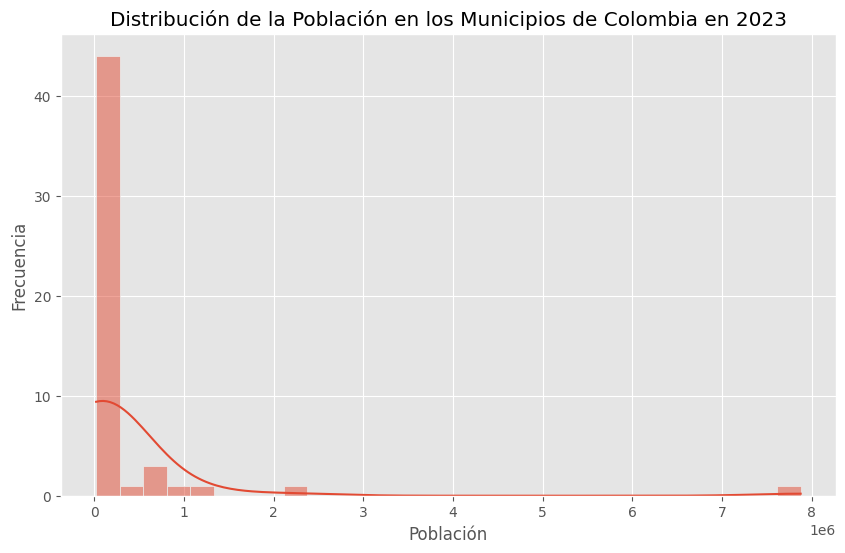

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Population Projection (P) 2023-06-30'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Población en los Municipios de Colombia en 2023')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.show()

**Distribución de la Población en Municipios de Colombia (2023):**

La mayoría de los municipios de Colombia tienen una población pequeña, con una alta concentración de municipios cuya población está entre 0 y 1 millón de personas.

La gráfica muestra una distribución sesgada hacia la izquierda, lo que indica que solo unos pocos municipios tienen poblaciones grandes.

Los municipios más poblados, como Bogotá, Medellín y Cali, son una excepción, mientras que la gran mayoría de los municipios tienen poblaciones considerablemente más pequeñas.

* Poblaciones en los paises de América

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/AndreaCTS/BigData/refs/heads/main/paises_valores_2023.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre del país     45 non-null     object
 1   Año Más Reciente    45 non-null     int64 
 2   Valor Más Reciente  45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
df2.head()

,Nombre del país,Año Más Reciente,Valor Más Reciente
0,Antigua y Barbuda,2023,94298
1,Argentina,2023,46654581
2,Aruba,2023,106277
3,Bahamas,2023,412623
4,Barbados,2023,281995


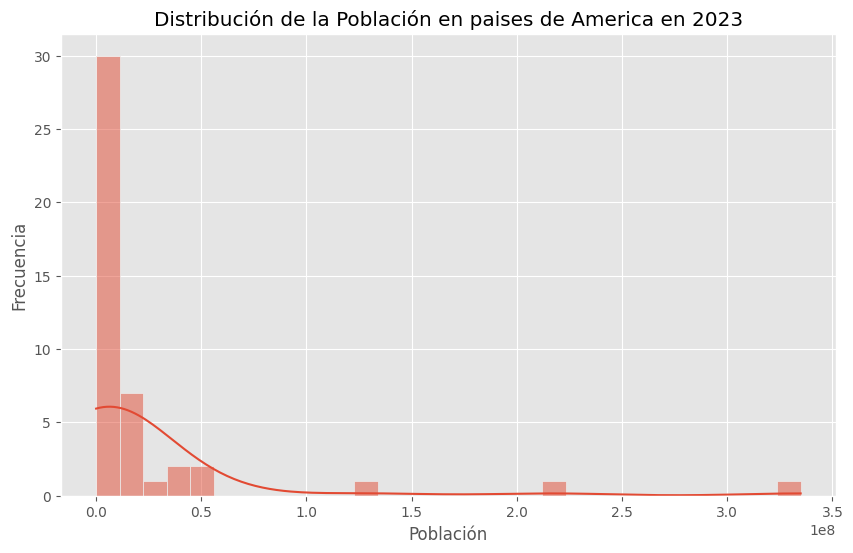

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Valor Más Reciente'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Población en paises de America en 2023')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.show()

**Distribución de la Población en los Países de América (2023):**

Similar a la distribución de los municipios colombianos, la población de los países de América también presenta una alta concentración en los países menos poblados.

Se observa que unos pocos países tienen una población significativamente más alta, como Estados Unidos y Brasil, lo que crea una distribución sesgada hacia la izquierda, con la mayoría de los países teniendo poblaciones menores.

La mayoría de los países americanos tienen poblaciones por debajo de los 100 millones de personas, pero unos pocos países tienen poblaciones significativamente más grandes (por ejemplo, más de 200 millones).

* Genere conclusiones a partir de los datos obtenidos.


### Conclusión general

Tanto en los municipios de Colombia como en los países de América, la población está altamente concentrada en un pequeño número de lugares que tienen una población significativamente mayor, mientras que la gran mayoría tiene una población mucho más pequeña. En otras palabras, hay una fuerte desigualdad en la distribución de la población: pocos municipios o países tienen poblaciones muy grandes, mientras que la mayoría tienen poblaciones pequeñas. Esto refleja una distribución desigual de la población en cada contexto, con centros urbanos o grandes países siendo los que concentran la mayoría de los habitantes.


# 7. Distribución exponencial

Suponga que el número de días que transcurren entre dos accidentes en una
fábrica de alimentos está descrito por la siguiente distribución de probabilidad

$$f_T(t)= \frac{1}{10}e^{-\frac{1}{10}t}$$

In [ ]:
import numpy as np

# lambda
lambda_val = 1 / 10

# Cálculo de las probabilidades
t_values = [3, 6, 10, 20]
probabilidades = [lambda_val * np.exp(-lambda_val * t) for t in t_values]

¿Cuál es la probabilidad de que existan 3 días entre 2 accidentes?

In [ ]:
probabilidades[0]

0.0740818220681718

¿Cuál es la probabilidad de que existan 6 días entre 2 accidentes?

In [ ]:
probabilidades[1]

0.05488116360940264

En qué proporción es más probable que ocurran 3 días entre dos accidentes que 6 días entre dos
accidentes

In [ ]:
proporcion_3_to_6 = probabilidades[0] / probabilidades[1]
proporcion_3_to_6

1.3498588075760032

¿Cuál es la probabilidad de que existan 10 días entre 2 accidentes?

In [ ]:
probabilidades[2]

0.036787944117144235

¿Cuál es la probabilidad de que existan 20 días entre 2 accidentes?

In [ ]:
probabilidades[3]

0.013533528323661271

En qué proporción es más probable que ocurran 3 días entre dos accidentes que 20 días entre dos
accidentes

In [ ]:
proporcion_3_to_20 = probabilidades[0] / probabilidades[3]
proporcion_3_to_20

5.4739473917272

* Utilice los valores anteriores para concluir si la distribución exponencial es libre de escala

Los resultados muestran una tendencia clara: a medida que aumentan los días entre accidentes, la probabilidad de que ocurra uno disminuye, lo cual es coherente con una distribución exponencial. En este sentido, cuanto más tiempo pasa sin un accidente, menos probable es que suceda.

Al comparar las probabilidades entre 3 y 6 días, se observa que los accidentes tienden a ocurrir en lapsos más cortos. La mayor frecuencia de eventos a los 3 días, en contraste con los 20 días, refuerza la idea de que, aunque ambos son sucesos poco frecuentes, los accidentes suelen agruparse en períodos de tiempo más cercanos.

En cuanto a las características de la distribución exponencial, es conocida por ser independiente de la escala, lo que implica que su forma permanece constante a diferentes escalas temporales. Los resultados coinciden con esta propiedad, ya que se observa que los eventos más cercanos tienen una mayor probabilidad de ocurrencia en comparación con aquellos más lejanos, lo que respalda el uso de la distribución exponencial para modelar el tiempo entre eventos en un contexto sin memoria significativa.